 # Model evaluation challenge - US Income

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


sns.set(style='white', context='notebook', palette='deep')



## Loading and exploring the dataset

In [2]:
# Load training and test data into pandas dataframes
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

# merge training and test sets into one dataframe
full = pd.concat([train, test])

In [3]:
# Get size of dataframes
for dataframe in [train, test, full]:
    print(dataframe.shape)

(32561, 15)
(16281, 15)
(48842, 15)


In [4]:
# Number of null values in train and test data

train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [65]:
full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [6]:
full.dtypes


age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

In [7]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week',]

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

<AxesSubplot:>

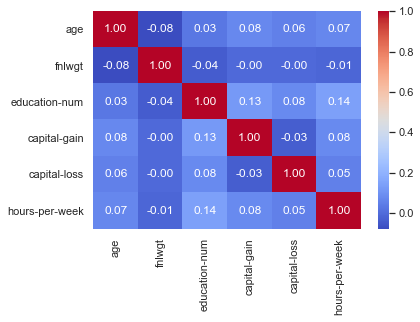

In [8]:
# Correlation matrix between numerical values
g = sns.heatmap(full[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


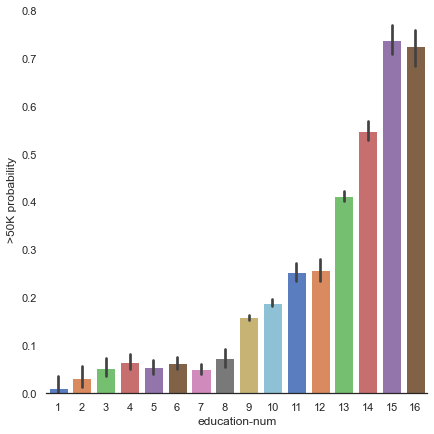

In [9]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=full,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


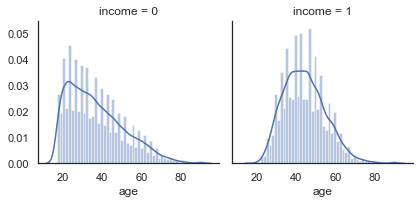

In [10]:
# Explore Age vs Income
g = sns.FacetGrid(full, col='income')
g = g.map(sns.distplot, "age")
g

Text(0, 0.5, 'Income >50K Probability')

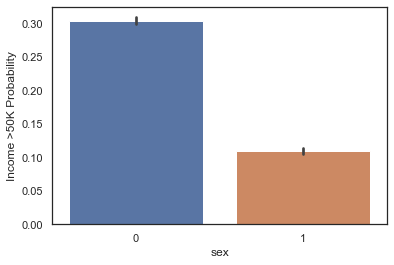

In [11]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=full)
g = g.set_ylabel("Income >50K Probability")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


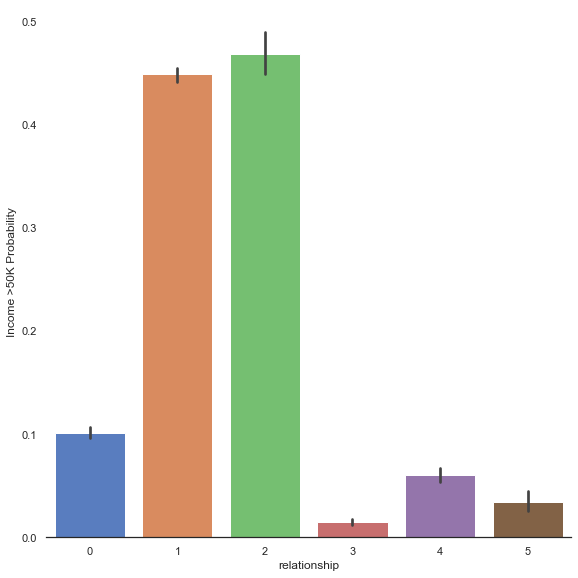

In [12]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=full,kind="bar", size = 8,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


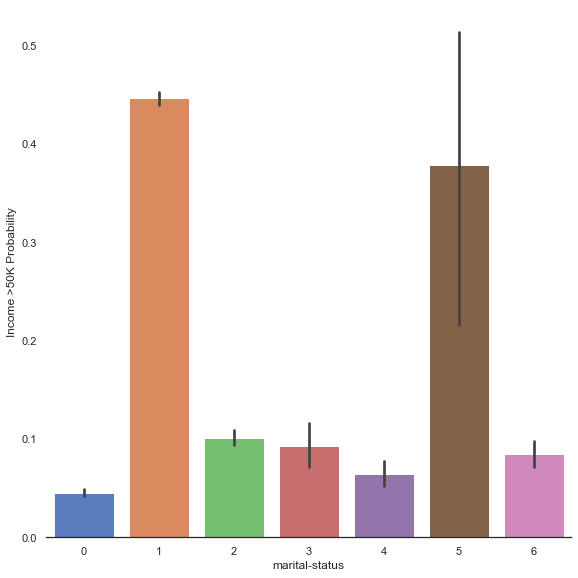

In [13]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="income",data=full,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g

In [27]:
full[cat_features].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [28]:
X = full.iloc[:, :-1].values
y = full.iloc[:, -1].values

In [29]:
X.shape,y.shape

((48842, 14), (48842,))

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
print(X_train)

[[    42      0 197344 ...      0     40      0]
 [    34      2 340940 ...      0     60      0]
 [    32      4 177566 ...      0     50     11]
 ...
 [    41      1 344624 ...      0     60      0]
 [    47      1 104489 ...      0     40      0]
 [    25      2 186925 ...      0     48      0]]


In [32]:
print(y_train)

[0 1 0 ... 1 1 0]


In [33]:
print(X_test)

[[    41      2 151856 ...      0     40      0]
 [    57      1  87584 ...      0     25      0]
 [    31      4 220669 ...      0     40      0]
 ...
 [    25      2 214413 ...      0     40      0]
 [    65      4 205024 ...      0      8      0]
 [    35      0  52738 ...      0     40      0]]


In [34]:
print(y_test)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
print(X_train)

[[ 0.24480906 -1.87782354  0.07519069 ... -0.21642339 -0.03431036
  -0.25285143]
 [-0.33937091 -0.2550973   1.4398243  ... -0.21642339  1.5704172
  -0.25285143]
 [-0.4854159   1.36762894 -0.11276527 ... -0.21642339  0.76805342
   1.94852725]
 ...
 [ 0.17178656 -1.06646042  1.4748344  ... -0.21642339  1.5704172
  -0.25285143]
 [ 0.60992154 -1.06646042 -0.80723677 ... -0.21642339 -0.03431036
  -0.25285143]
 [-0.99657337 -0.2550973  -0.02382403 ... -0.21642339  0.60758067
  -0.25285143]]


## Training the Random Forest Classification model on the Training set

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
base_model = RandomForestClassifier(n_estimators=10,random_state=42) #classifier with default params
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_train, y_train)
print("Evaluating the base model on the training set yields an accuracy of {}%".format(base_accuracy*100))
base_accuracy = base_model.score(X_test, y_test)
print(" the base model on the testing set an accuracy of {:.2f}%".format(base_accuracy*100))
print('Parameters currently in use:')
print(base_model.get_params()) #check which params are in use

Evaluating the base model on the training set yields an accuracy of 98.75515273948295%
 the base model on the testing set an accuracy of 85.19%
Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8791  565]
 [1197 1658]]


0.8557038735566292

In [41]:
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive:1',
                                         'Actual Negative:0'],
                        index=['Predict Positive:1',
                              'Predict Negative:0'])
cm_matrix

,Actual Positive:1,Actual Negative:0
Predict Positive:1,8791,565
Predict Negative:0,1197,1658


<AxesSubplot:>

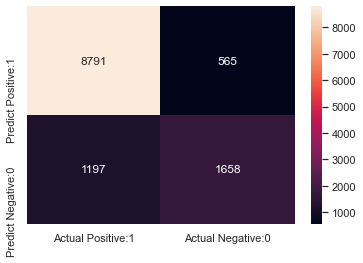

In [42]:
sns.heatmap(cm_matrix,annot=True,fmt='d')

## Applying k-Fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.01 %
Standard Deviation: 0.58 %


## accuracy score & n-estimators 

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)


0.8557038735566292

## n_estimators=100

In [46]:
# n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=42)
rfc_100.fit(X_train,y_train)
y_pred_100 = rfc_100.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_100)

0.8608631561706658

-> I have used all the features given in the model.
NEXT, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follow

In [51]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [53]:
clf.feature_importances_

array([0.15498582, 0.03754648, 0.17308799, 0.02830289, 0.09027071,
       0.08349056, 0.07241159, 0.07591237, 0.0137116 , 0.01841312,
       0.11669771, 0.03493744, 0.08307528, 0.01715643])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9356
           1       0.75      0.58      0.65      2855

    accuracy                           0.86     12211
   macro avg       0.81      0.76      0.78     12211
weighted avg       0.85      0.86      0.85     12211



## Random search model 

In [58]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## RandomTreeClassifier hyperparameter tuning by RandomizedSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(250,2500,250)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
rf_random = RandomizedSearchCV(RandomForestClassifier(), random_grid, n_iter = 50, cv = 2, verbose=1, 
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.9min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=1)

## ROC curve 

In [164]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

In [165]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [166]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(10)):
    clf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

ValueError: y should be a 1d array, got an array of shape (48842, 2) instead.